In [1]:
import loader 
import pipeline 
from PIL import Image
from transformers import CLIPTokenizer
import torch 
import numpy as np
import torchvision.transforms as transforms 

DEVICE = "cpu"

ALLOW_CUDA = True 
ALLOW_MPS = False 

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device: {DEVICE}")

/home/anton/anaconda3/envs/diffusion/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda


In [2]:
tokenizer = CLIPTokenizer("../data/vocab.json", merges_file="../data/merges.txt")
model_file = "../data/v1-5-pruned-emaonly.ckpt"

In [3]:
models = loader.preload_models_from_standard_weights(model_file, DEVICE)

In [4]:
# prompt = "A cat stretching on a bed, highly detailed, ultra sharp, cinematic, 8k resolution. The cat should be cute."
# uncond_prompt = "" # you can use it as a negative prompt 

# Image to Image

In [5]:
input_image = None 
image_path = "../images/cat.jpg"
# input_image = Image.open(image_path)

In [6]:
strength = 0.9
sampler = "ddpm"
num_inference_steps = 100
seed = np.random.randint(0, 50)
do_cfg = True 
cfg_scale = 7

In [11]:
i2i_prompt = "A scene with mountains, hills, rivers with clouds in the sky. make it 8k, ultra sharp, highly detailed, cinematic."
uncond_prompt = "" # you can use it as a negative prompt 

In [12]:
output_image = pipeline.generate(
    prompt = i2i_prompt,
    uncond_prompt = uncond_prompt,
    input_image = input_image,
    strength = strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer
)

100%|██████████| 100/100 [00:35<00:00,  2.83it/s]


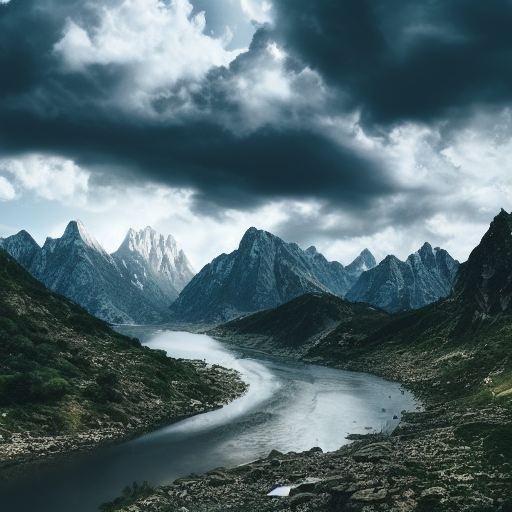

In [13]:
Image.fromarray(output_image)

In [10]:
#saving the image 
image = Image.fromarray(output_image)
image.save("../images/scene.jpg")